In [1]:
import os
import datetime
import pygrib
import pickle
import numpy as np
import pygrib
import matplotlib.pyplot as plt
cur_location = os.getcwd()

Step1. setting up beginning and ending date.

In [2]:
start_date = datetime.date(2021, 3, 1)
end_date = datetime.date(2021, 11, 1)
time_between_dates = end_date - start_date
days_between_dates = time_between_dates.days

Step2. collect the cloudtop and VIL by using the maximum values of the entire matrix. And plot them saparately for each 15 mins.

In [27]:
entire_echotop={}
entire_VIL={}
for i in range(days_between_dates):
    current_date = start_date + datetime.timedelta(days=i)
    with open(cur_location+'/hrrrdata2021/hrrr{}.dat'.format(current_date), 'rb') as f:
        (echotop, VIL, names) = pickle.load(f)
    for h in range(24):
        for m in [0,15,30,45]:
            cur_time = h*100+m
            stamp = str(current_date)+'-'+str(cur_time)
            entire_echotop[stamp]=np.max(echotop[cur_time])
            entire_VIL[stamp]=np.max(VIL[cur_time])

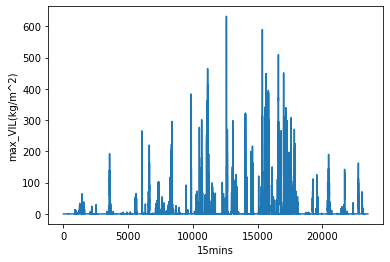

In [28]:
plt.plot(entire_VIL.values())
plt.ylabel('max_VIL(kg/m^2)')
plt.xlabel('15mins')
plt.show()

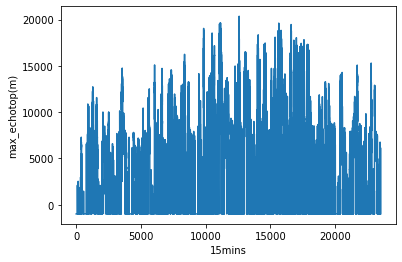

In [29]:
plt.plot(entire_echotop.values())
plt.ylabel('max_echotop(m)')
plt.xlabel('15mins')
plt.show()

In [32]:
# entire_VIL.values()/entire_echotop.values()
VIL_Density = {}
for key in entire_VIL:
    if key in entire_echotop:
        VIL_Density[key] = entire_VIL[key] / (entire_echotop[key])*1000
    else:
        pass

In [33]:
convective_day = {}
for key in VIL_Density:
    if VIL_Density[key]>3:
      convective_day[key] = VIL_Density[key]
print(convective_day)

{'2021-03-14-245': 3.0593868697233173, '2021-03-15-2100': 8.58805428226137, '2021-03-15-2115': 4.920707239821488, '2021-03-15-2130': 3.406884884686275, '2021-03-17-745': 3.7365764290865147, '2021-03-23-2030': 3.1029206171678396, '2021-04-07-15': 4.7565890510835676, '2021-04-07-30': 4.599407439247171, '2021-04-07-45': 11.028416141750837, '2021-04-07-100': 6.1547908084146545, '2021-04-07-115': 7.201941194810828, '2021-04-07-130': 9.169999853486294, '2021-04-07-145': 7.600939846914506, '2021-04-07-200': 4.662309766464055, '2021-04-07-215': 6.881027980263257, '2021-04-07-230': 6.797954650486739, '2021-04-07-245': 3.8124635809565803, '2021-04-07-300': 14.475327685061172, '2021-04-07-315': 6.593356933042103, '2021-04-07-330': 5.715999580102875, '2021-04-07-345': 6.987821421494657, '2021-04-07-415': 6.948298900195292, '2021-04-07-430': 4.798840597213206, '2021-04-07-445': 6.281267886700802, '2021-04-07-515': 8.715657569367538, '2021-04-07-530': 3.6708799768722997, '2021-04-07-545': 3.67754129

In [34]:
len(entire_echotop)

0

In [36]:
len(convective_day)

1268

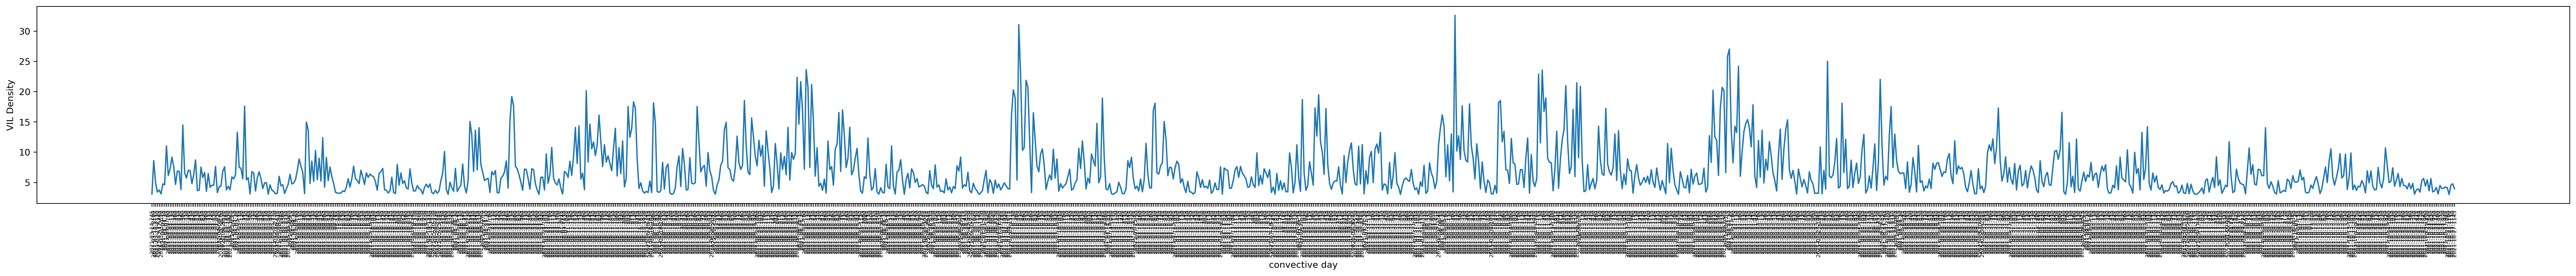

In [38]:
fig = plt.figure(dpi=300,figsize=(50,4)) 
plt.plot(convective_day.keys(),convective_day.values())
plt.ylabel('VIL Density')
plt.xlabel('convective day')
plt.tick_params(axis='x', labelsize=6)
plt.xticks(rotation=90)
plt.show()

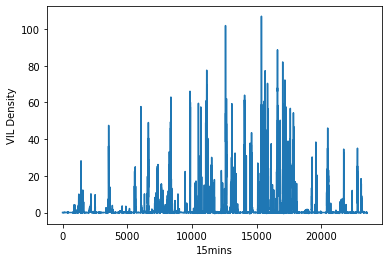

In [19]:
plt.plot(VIL_Density.values())
plt.ylabel('VIL Density')
plt.xlabel('15mins')
plt.show()

Step3. collect the cloudtop and VIL by using the maximum values of the entire matrix. And plot them saparately for hours.

In [56]:
entire_cloudtop={}
entire_VIL={}
for i in range(days_between_dates):
    current_date = start_date + datetime.timedelta(days=i)
    with open(cur_location+'/hrrrdata2021/hrrr{}.dat'.format(current_date), 'rb') as f:
        (cloudtop, VIL, names) = pickle.load(f)
    for h in range(24):
        stamp = str(current_date)+"-"+str(h)
        res_cloudtop = -1000000
        res_VIL = - 1000000
        for m in [0,15,30,45]:
            cur_time = h*100+m

            res_cloudtop=max(res_cloudtop, np.max(cloudtop[cur_time]))
            res_VIL = max(res_VIL, np.max(VIL[cur_time]))
        entire_cloudtop[stamp] = res_cloudtop
        entire_VIL[stamp] = res_VIL

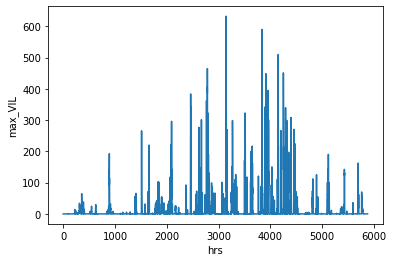

In [57]:
plt.plot(entire_VIL.values())
plt.ylabel('max_VIL')
plt.xlabel('hrs')
plt.show()

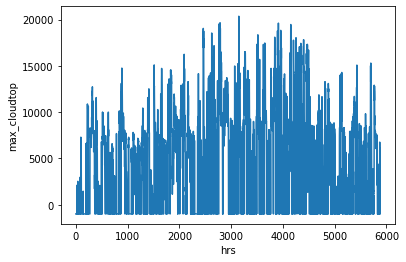

In [58]:
plt.plot(entire_cloudtop.values())
plt.ylabel('max_cloudtop')
plt.xlabel('hrs')
plt.show()